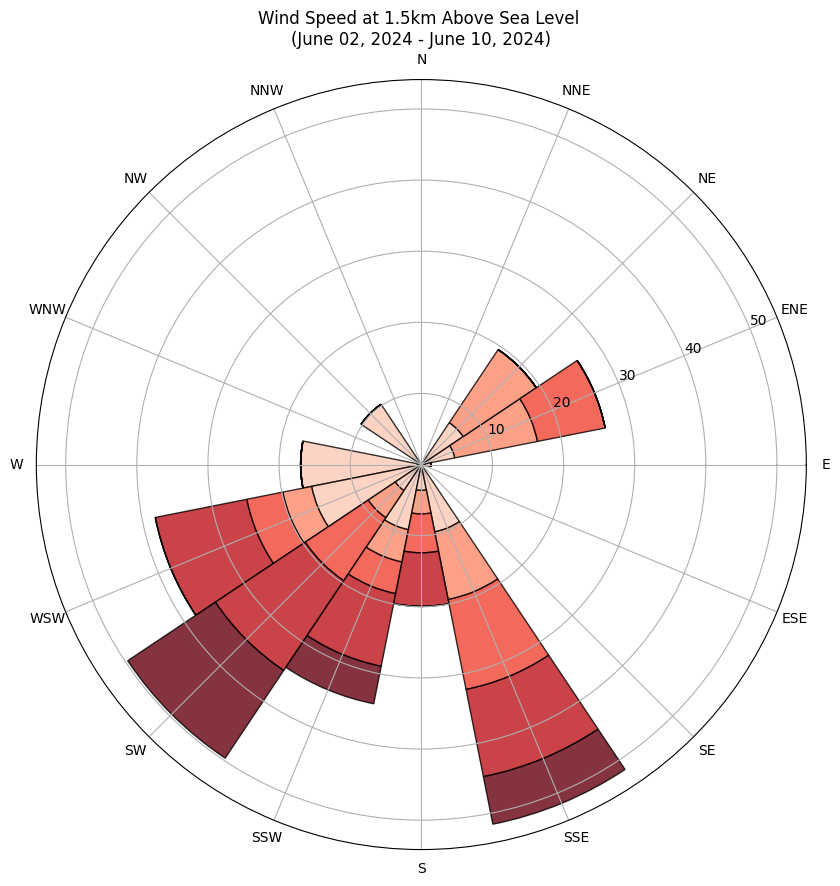

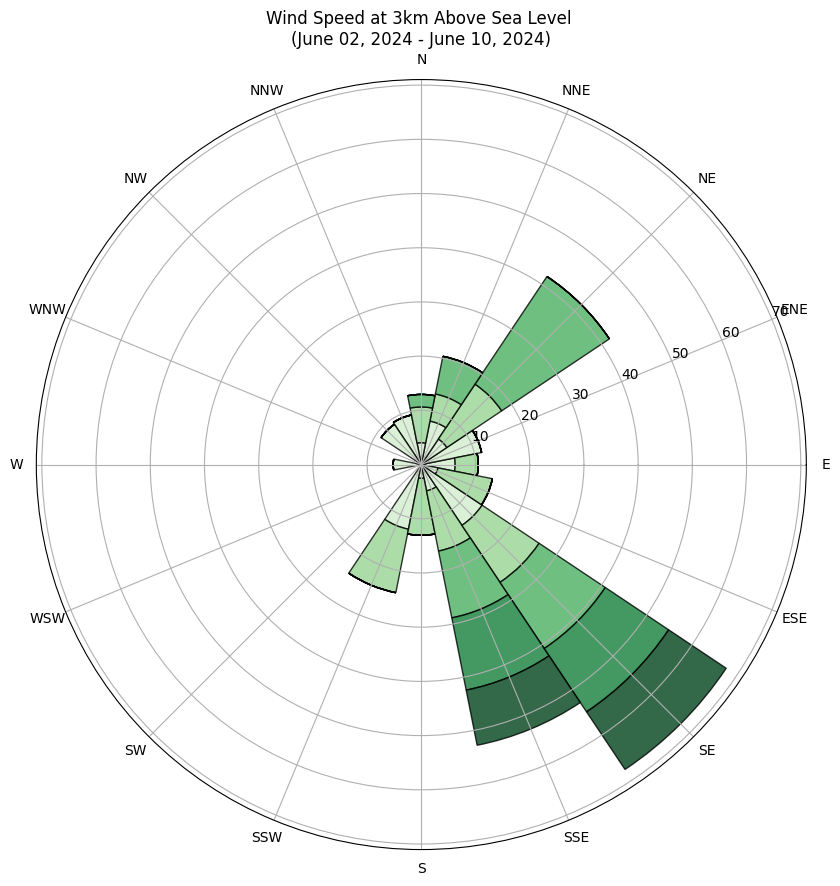

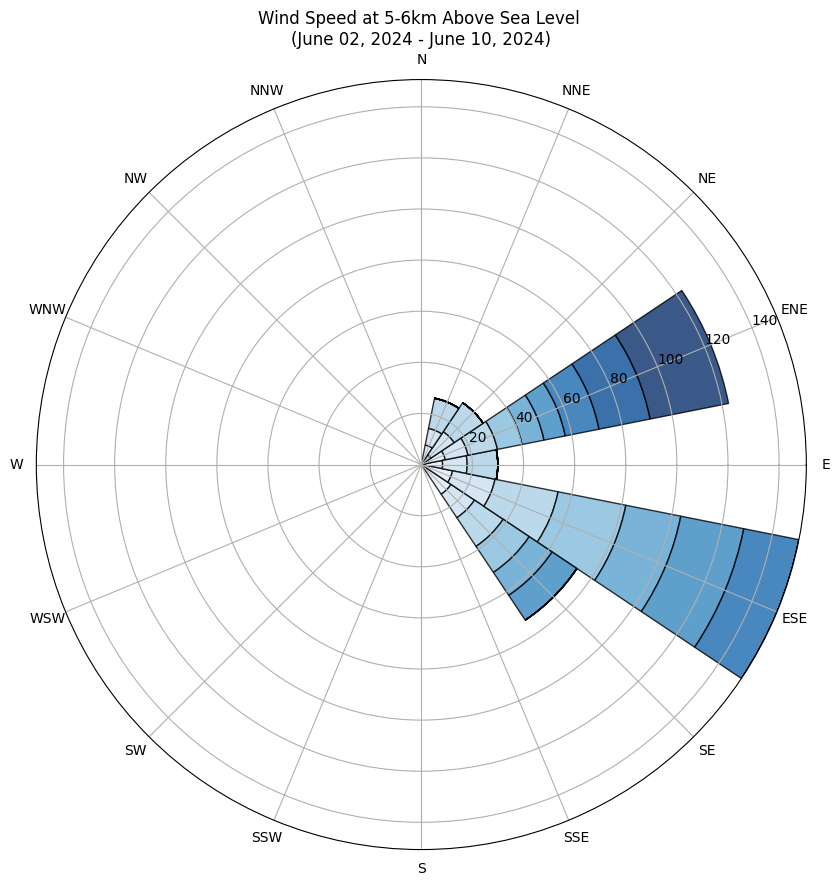

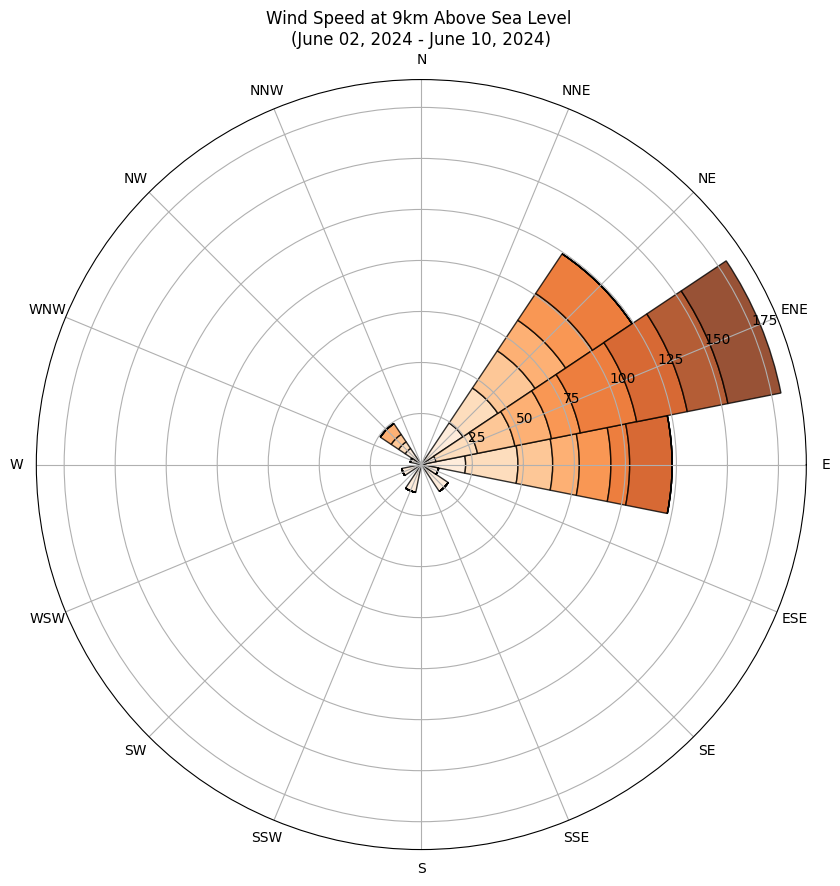

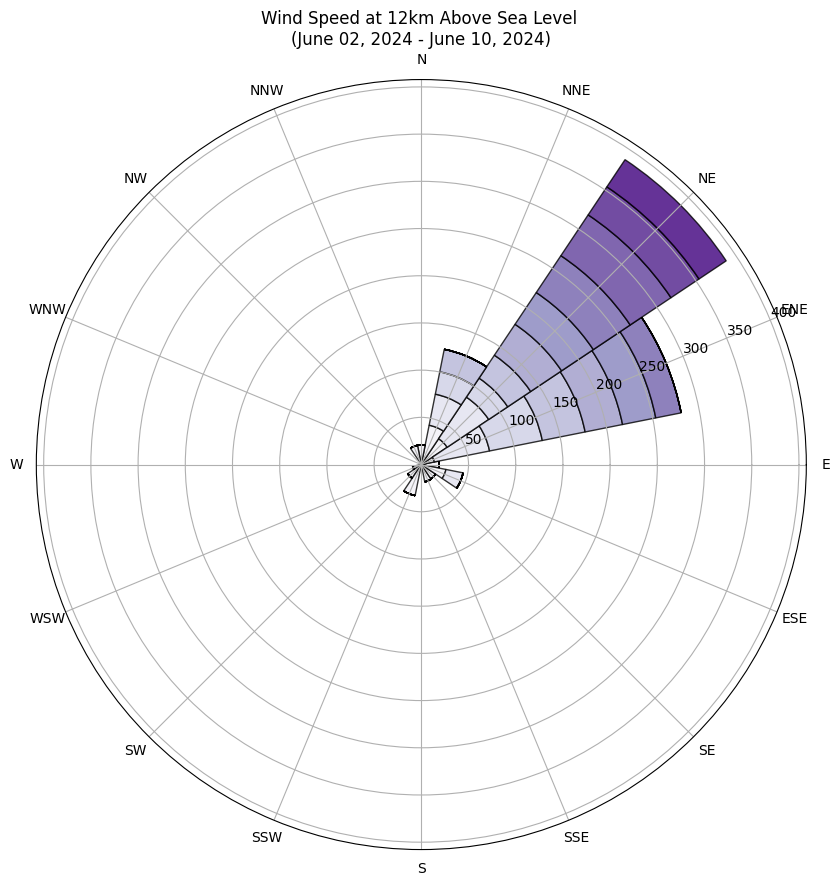

In [21]:
import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from datetime import datetime, timedelta

def plot_windrose(file_path: str, start_date: str, range_days: int):
    """
    Plots windrose data for a specified date range and pressure levels.

    :param file_path: Path to the JSON file containing windrose data.
    :param start_date: Start date as a string (e.g., "June 02, 2024").
    :param range_days: Number of days to include in the windrose plot.
    """
    
    # Load the JSON data
    with open(file_path, 'r') as file:
        windrose_data = json.load(file)

    # Initialize defaultdict to hold wind speeds by pressure levels and directions
    cardinal = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']
    wind_speed_by_hpa_and_direction = defaultdict(lambda: {direction: [] for direction in cardinal})

    # Parse the start date and calculate the end date based on range_days
    start_date_dt = datetime.strptime(start_date, "%B %d, %Y")
    end_date_dt = start_date_dt + timedelta(days=range_days)

    # Process wind data
    for entry in windrose_data['windrose']:
        entry_date = datetime.strptime(entry['date'], "%B %d, %Y")

        if start_date_dt <= entry_date <= end_date_dt:
            for data in entry['data']:
                hpa = data['z_hPa']
                speed = data['speed_kph']
                direction = data['direction']
                
                if direction in wind_speed_by_hpa_and_direction[hpa]:
                    wind_speed_by_hpa_and_direction[hpa][direction].append(speed)

    # Fill empty lists with 0
    for hpa, directions in wind_speed_by_hpa_and_direction.items():
        for direction in directions:
            if not directions[direction]:
                directions[direction] = [0]

    # List of pressure levels for which to generate windrose plots
    pressure_levels = [850, 700, 500, 300, 200]
    altitude_labels = ["1.5km", "3km", "5-6km", "9km", "12km"]
    colors = ['Reds', 'Greens', 'Blues', 'Oranges', 'Purples']
    
    # Plotting the windrose data for each pressure level
    for hpa, alt, colors in zip(pressure_levels, altitude_labels, colors):
        if hpa in wind_speed_by_hpa_and_direction:
            directions = wind_speed_by_hpa_and_direction[hpa]

            # Create a new figure for each hPa level
            fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(15, 10))
            angles = np.linspace(0.0, 2 * np.pi, 16, endpoint=False)
            cmap = colormaps[colors]  # Blue color map

            bottoms = np.zeros(16)  # Reset the bottom for each hPa level
            max_entry = max(len(speeds) for speeds in directions.values())  # Max number of entries per direction
            shades = [cmap((i + 1) / max_entry) for i in range(max_entry)]  # Color shades

            # Loop over each "layer" (wind speed magnitude at different times)
            for i in range(max_entry):
                magnitudes = []  # Magnitude for each direction at this layer

                for direction in cardinal:
                    speeds = directions[direction]
                    if i < len(speeds):
                        magnitudes.append(speeds[i])
                    else:
                        magnitudes.append(0)  # If no data, append 0

                magnitudes = np.array(magnitudes)  # Convert to NumPy array
                ax.bar(angles, magnitudes, width=2 * np.pi / 16, bottom=bottoms, color=shades[i], edgecolor='k', alpha=0.8)

                # Update the bottom to stack the next layer
                bottoms += magnitudes

            # Set the title to indicate the pressure level
            ax.set_title(f'Wind Speed at {alt} Above Sea Level \n({start_date_dt.strftime("%B %d, %Y")} - {end_date_dt.strftime("%B %d, %Y")})')
            ax.set_xticks(angles)
            ax.set_xticklabels(cardinal)
            plt.show()

# Example of how to call the function
plot_windrose('windrose_data_hres.json', 'June 02, 2024', 8)


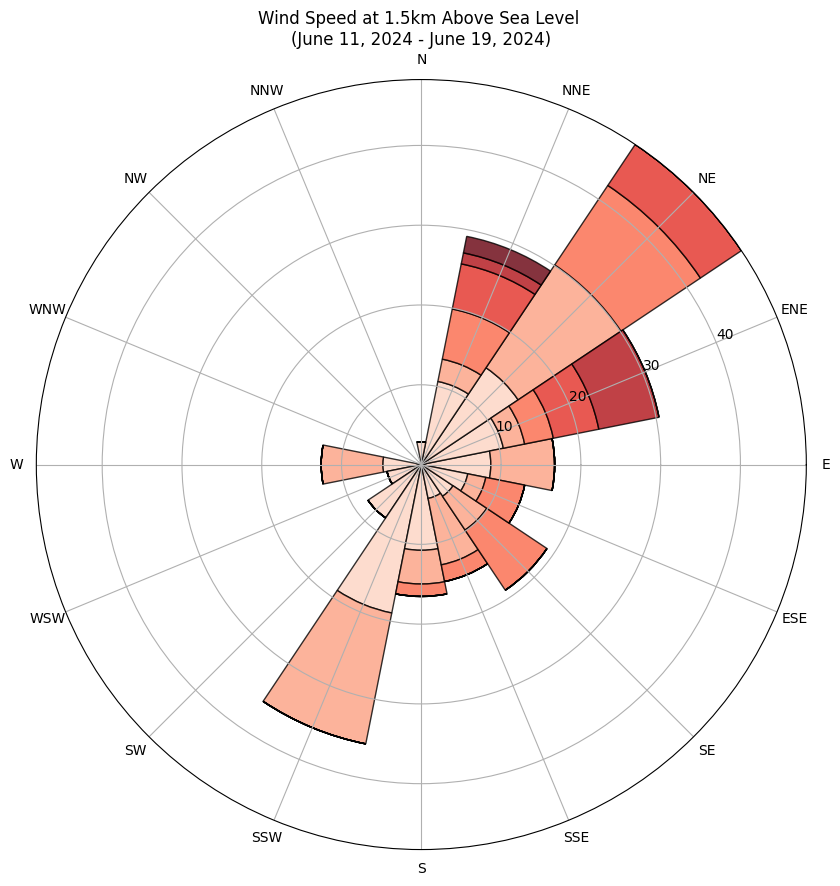

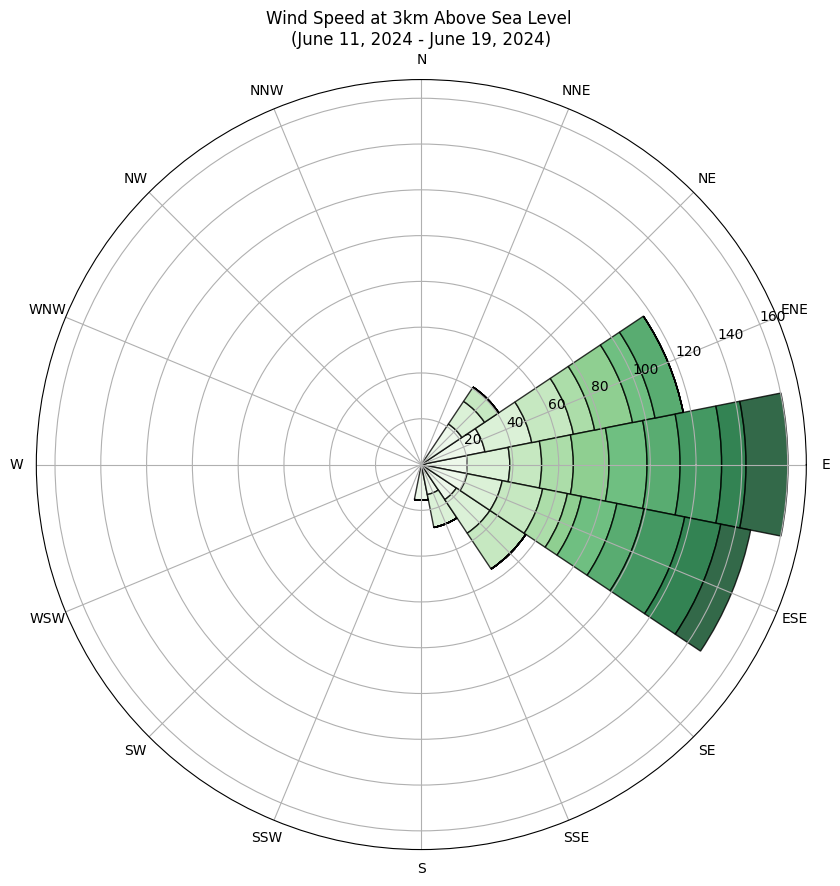

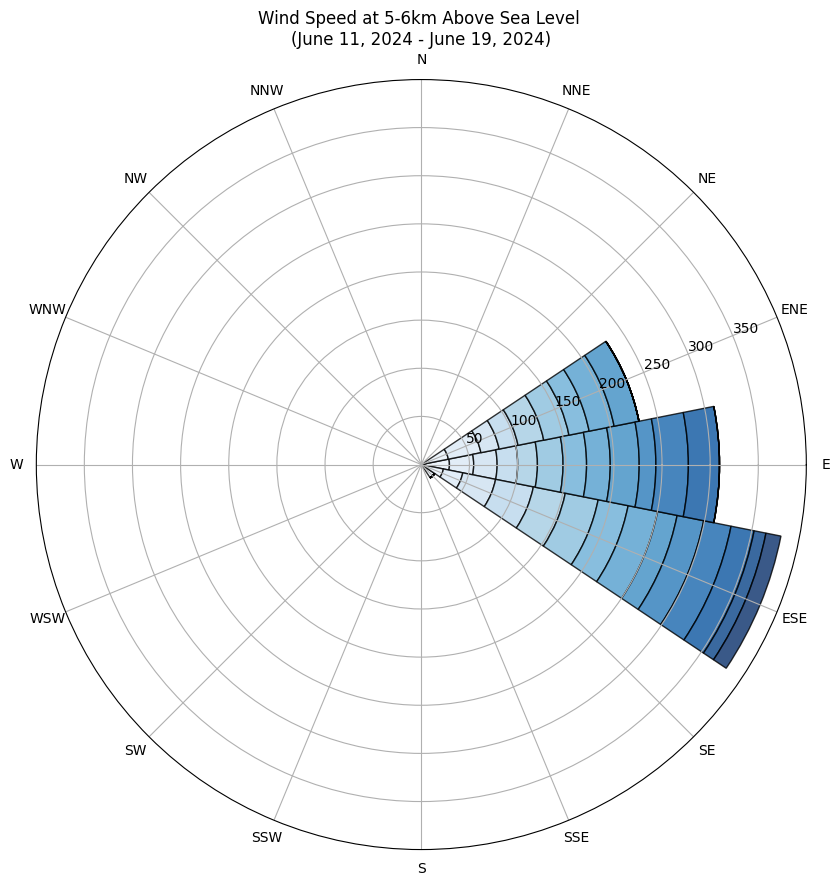

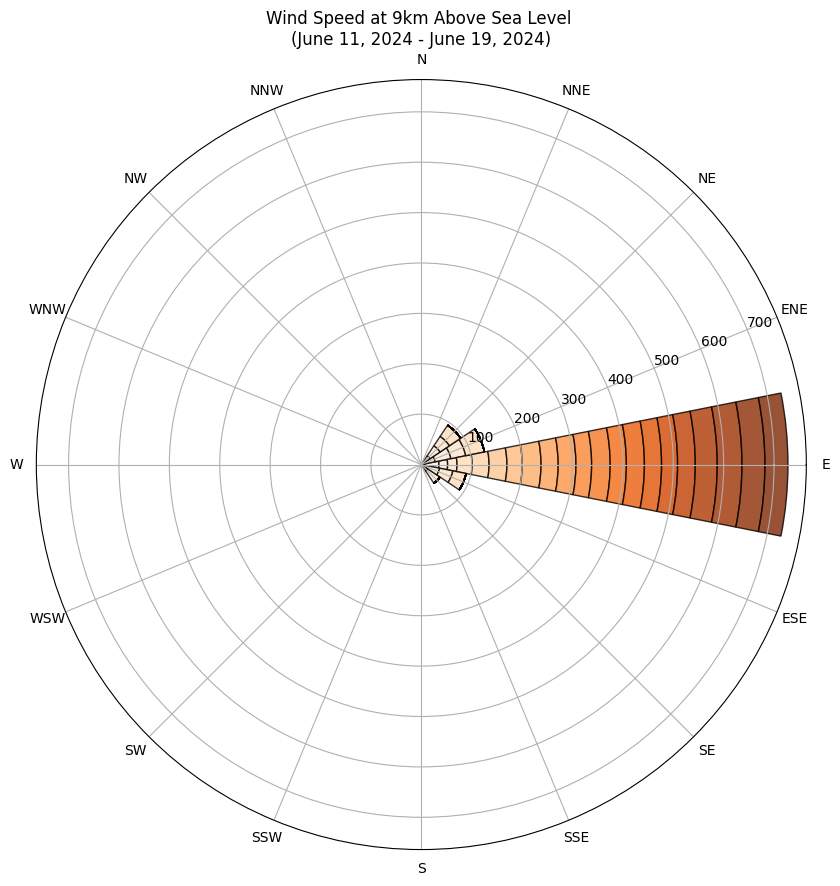

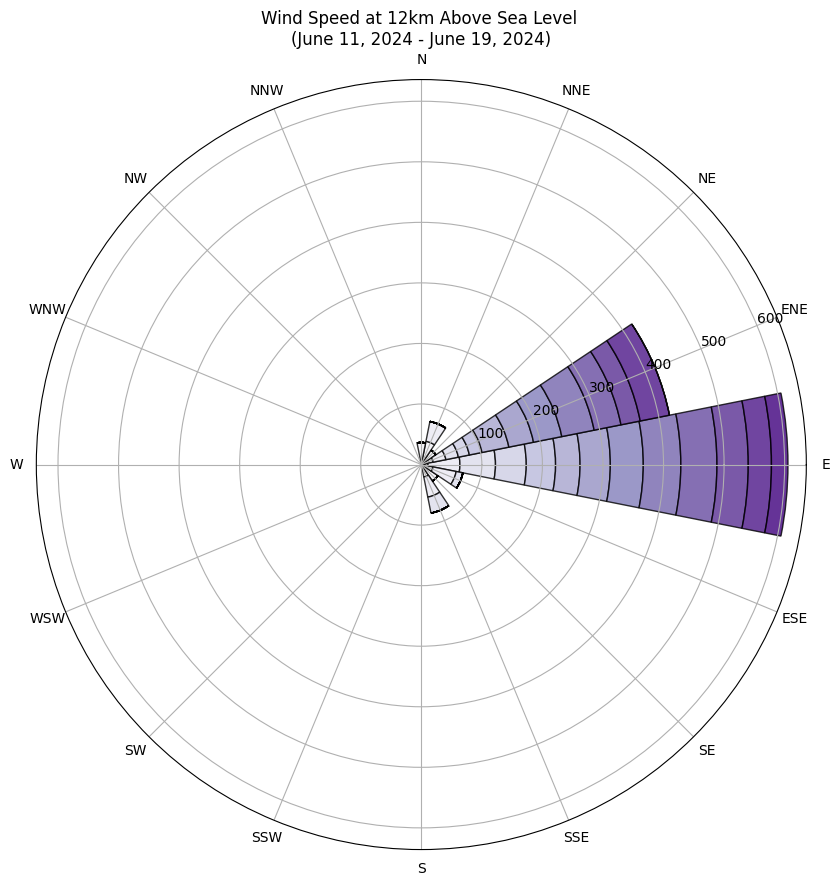

In [22]:
plot_windrose('windrose_data_hres.json', 'June 11, 2024', 8)


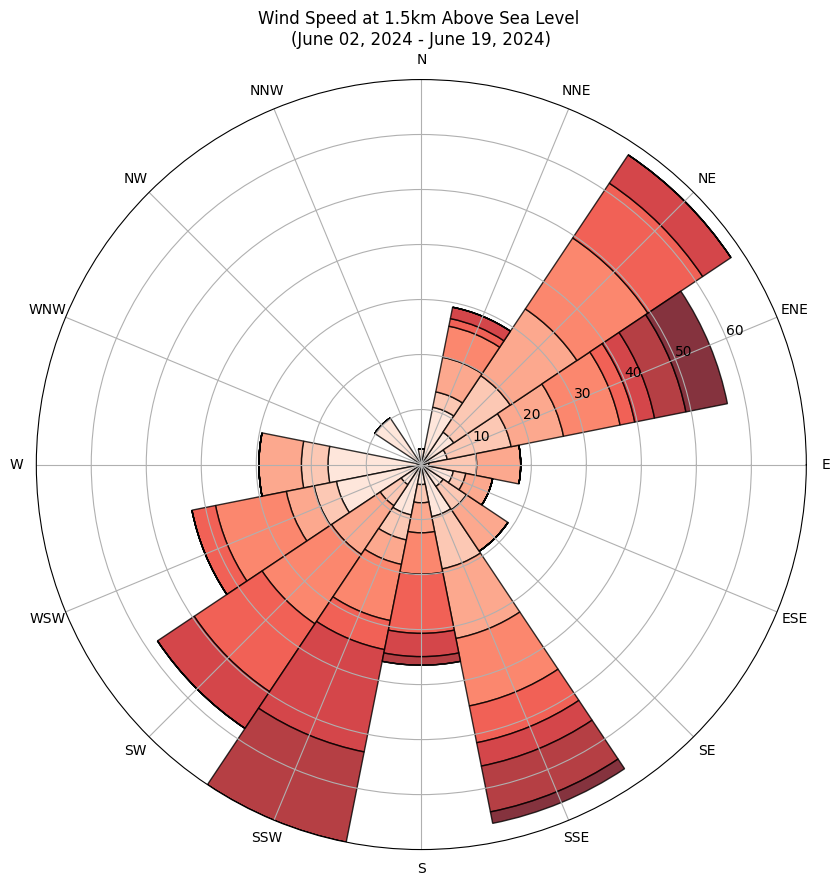

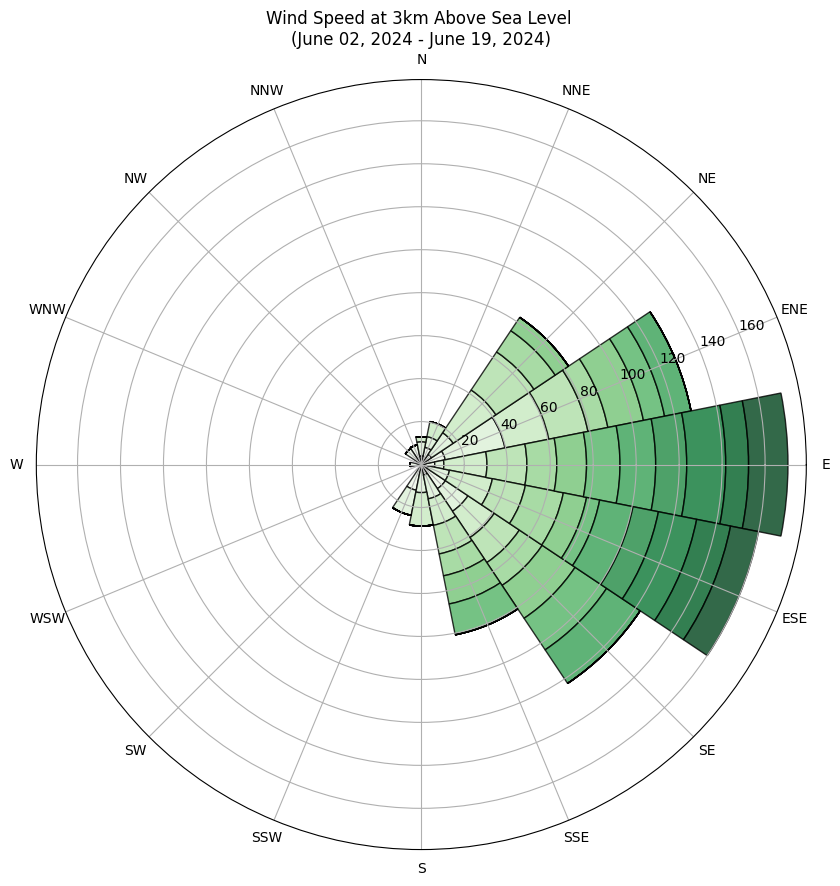

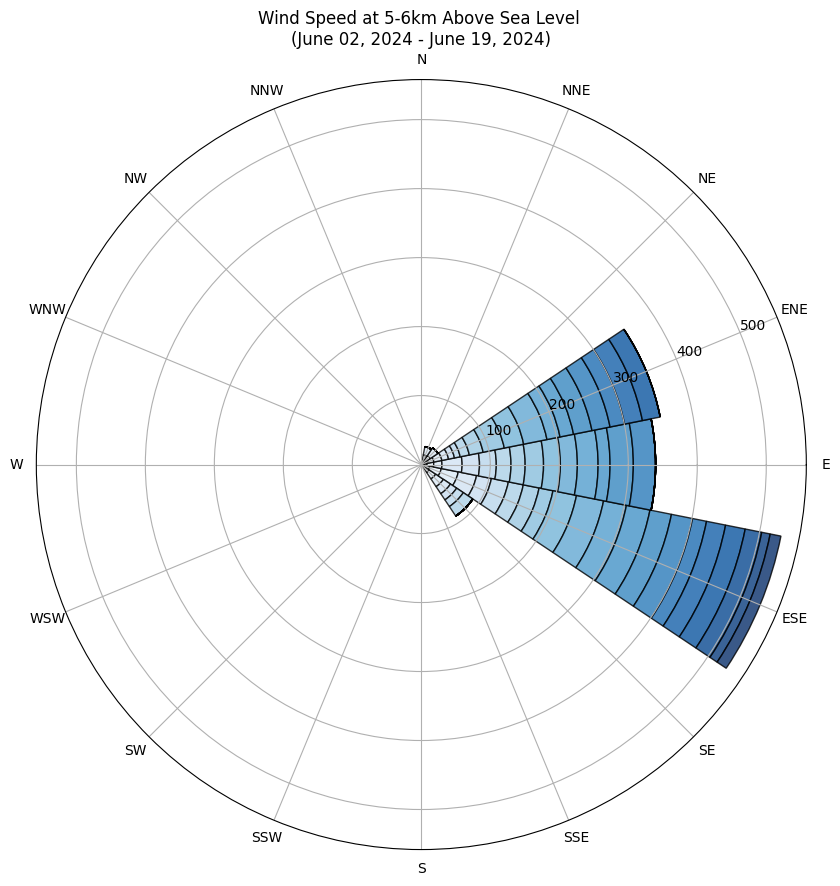

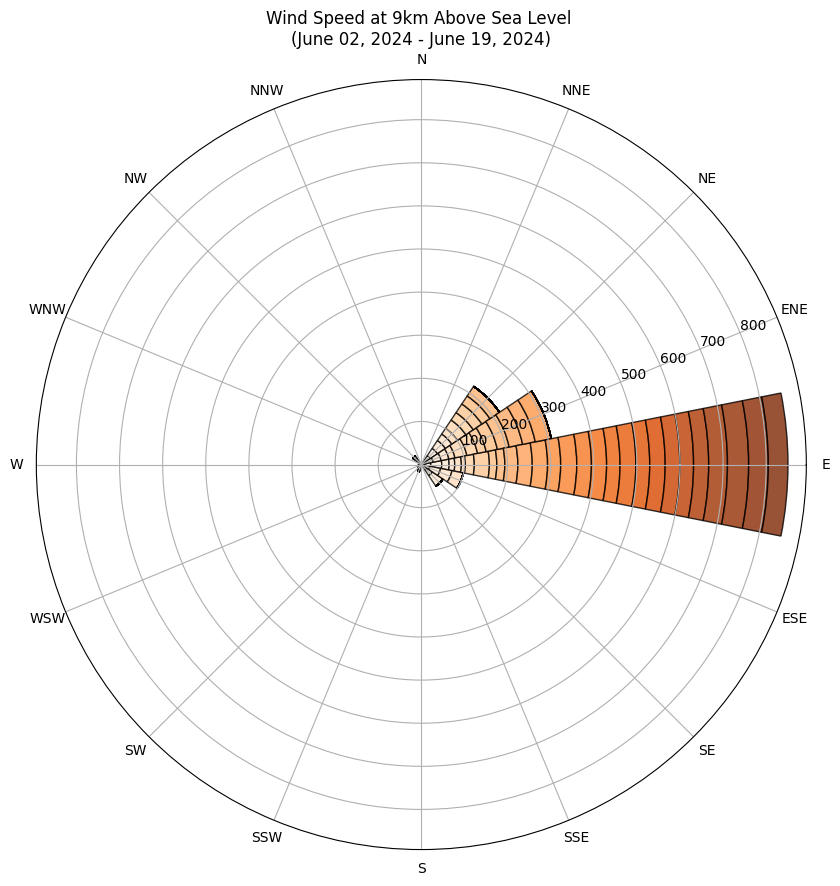

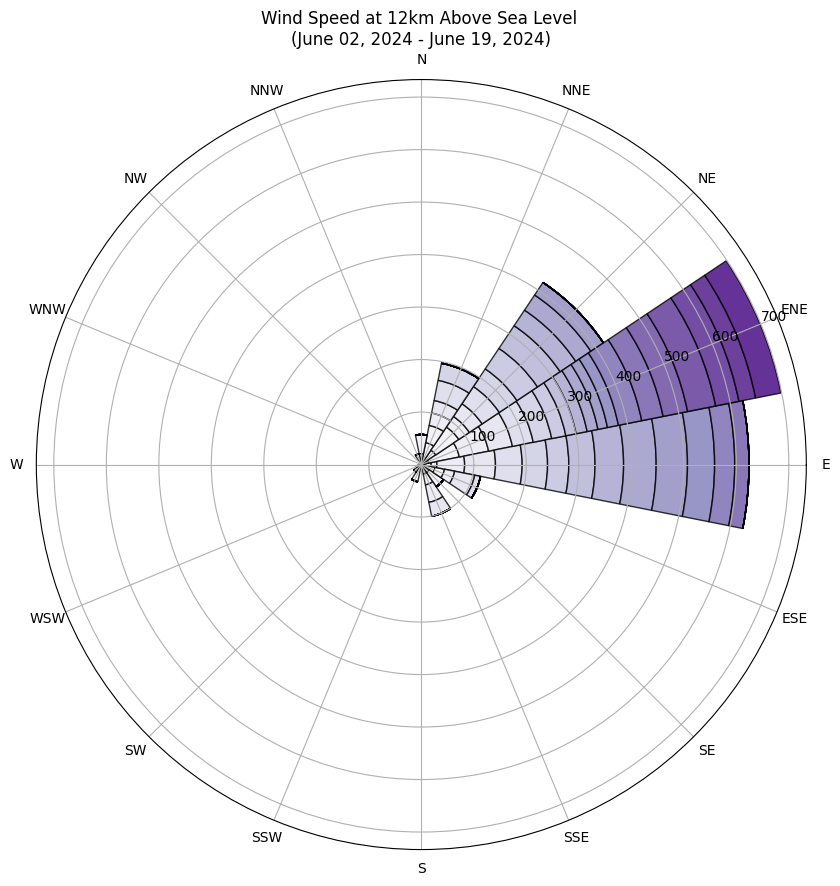

In [20]:
plot_windrose('windrose_data_hres.json', 'June 02, 2024', 17)